<h1 align="center">IBM DATASCIENCE CAPSTONE</h1>

<h4 align="center">"IBM Data Science Capstone Project for Coursera platform"</h4>

<h2 align="center">Business Analysis, in the city of Toulouse</h2>

&nbsp;

&nbsp;

<h4 align="center">AUTHOR : Benoit Mateu</h4>

<h4 align="center">April 2020</h4>

&nbsp;

&nbsp;

<img src="https://cdn.radiofrance.fr/s3/cruiser-production/2017/01/d41adcce-3942-4d41-8afc-80ef16183f55/870x489_16128085_1350071735056222_718893364_n.webp" alt="" />

&nbsp;

In [2]:
import requests 
import pandas as pd 
import numpy as np 
import random 
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim
from IPython.display import Image 
from IPython.core.display import HTML 
from pandas.io.json import json_normalize
!conda install -c conda-forge folium=0.5.0 --yes
from bs4 import BeautifulSoup
from sklearn import linear_model
import folium 
print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::ca-certificates-2020.1.1-0
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::certifi-2019.11.28-py37_0, defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::certifi-2019.11.28-py37_0
  - anaconda

In [3]:
CLIENT_ID = 'VPIEOPDNXOS3SSPEJQWHWAYKX4LH1TDVBVVS544YTSU3A12B'
CLIENT_SECRET = 'RMUXDVT5QVADDSKZPMVFPTXEBYICXP4RKXK3KNYNQKGOQRBI'
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VPIEOPDNXOS3SSPEJQWHWAYKX4LH1TDVBVVS544YTSU3A12B
CLIENT_SECRET:RMUXDVT5QVADDSKZPMVFPTXEBYICXP4RKXK3KNYNQKGOQRBI


In [4]:
address = 'Toulouse, FR'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.6044622 1.4442469


In [5]:
search_query = 'Toulouse'
radius = 20000
print(search_query + ' .... OK!')

Toulouse .... OK!


In [6]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=VPIEOPDNXOS3SSPEJQWHWAYKX4LH1TDVBVVS544YTSU3A12B&client_secret=RMUXDVT5QVADDSKZPMVFPTXEBYICXP4RKXK3KNYNQKGOQRBI&ll=43.6044622,1.4442469&v=20180604&query=Toulouse&radius=20000&limit=30'

In [7]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e943da747e0d6001b295b1b'},
 'response': {'venues': [{'id': '50229011e4b052a44798ef0a',
    'name': 'Toulouse',
    'location': {'lat': 43.60438617150067,
     'lng': 1.443629264831543,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.60438617150067,
       'lng': 1.443629264831543}],
     'distance': 50,
     'postalCode': '31000',
     'cc': 'FR',
     'state': 'Midi-Pyrénées',
     'country': 'France',
     'formattedAddress': ['31000', 'France']},
    'categories': [{'id': '50aa9e094b90af0d42d5de0d',
      'name': 'City',
      'pluralName': 'Cities',
      'shortName': 'City',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/neighborhood_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1586773489',
    'hasPerk': False},
   {'id': '4bda9c29c79cc928fd3f7fe9',
    'name': 'Office de Tourisme de Toulouse',
    'location': {'address': 'Square Charles de Gaulle',
     'lat': 43.60

In [8]:
venues = results['response']['venues']
dataframe = json_normalize(venues)
dataframe.head()

C:\Users\redge\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.state,location.country,location.formattedAddress,location.address,location.city,venuePage.id,location.crossStreet,location.neighborhood
0,50229011e4b052a44798ef0a,Toulouse,"[{'id': '50aa9e094b90af0d42d5de0d', 'name': 'C...",v-1586773489,False,43.604386,1.443629,"[{'label': 'display', 'lat': 43.60438617150067...",50,31000,FR,Midi-Pyrénées,France,"[31000, France]",NaN,NaN,NaN,NaN,NaN
1,4bda9c29c79cc928fd3f7fe9,Office de Tourisme de Toulouse,"[{'id': '4f4530164b9074f6e4fb00ff', 'name': 'T...",v-1586773489,False,43.604515,1.444769,"[{'label': 'display', 'lat': 43.60451541222345...",42,31080,FR,Midi-Pyrénées,France,"[Square Charles de Gaulle, 31080 Toulouse, Fra...",Square Charles de Gaulle,Toulouse,NaN,NaN,NaN
2,4f4ddb1be4b0b2a2fe435f3a,Novotel Toulouse Wilson,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1586773489,False,43.605183,1.446858,"[{'label': 'display', 'lat': 43.60518276615592...",225,31000,FR,Midi-Pyrénées,France,"[15 Place Wilson, 31000 Toulouse, France]",15 Place Wilson,Toulouse,NaN,NaN,NaN
3,573cc3d4498e7370024320ce,Nature et Découvertes Toulouse,"[{'id': '4bf58dd8d48988d128951735', 'name': 'G...",v-1586773489,False,43.603607,1.445054,"[{'label': 'display', 'lat': 43.60360668, 'lng...",115,31000,FR,Occitanie,France,"[64 Rue de la Pomme, 31000 Toulouse, France]",64 Rue de la Pomme,Toulouse,577301103,NaN,NaN
4,4c068ca12e80a593954374f9,Yogurt Factory (Toulouse),"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",v-1586773489,False,43.603657,1.442542,"[{'label': 'display', 'lat': 43.603657, 'lng':...",164,31000,FR,Midi-Pyrénées,France,"[58 rue Léon Gambetta, 31000 Toulouse, France]",58 rue Léon Gambetta,Toulouse,NaN,NaN,NaN


In [9]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,lat,lng,labeledLatLngs,distance,postalCode,cc,state,country,formattedAddress,address,city,crossStreet,neighborhood,id
0,Toulouse,City,43.604386,1.443629,"[{'label': 'display', 'lat': 43.60438617150067...",50,31000,FR,Midi-Pyrénées,France,"[31000, France]",NaN,NaN,NaN,NaN,50229011e4b052a44798ef0a
1,Office de Tourisme de Toulouse,Tourist Information Center,43.604515,1.444769,"[{'label': 'display', 'lat': 43.60451541222345...",42,31080,FR,Midi-Pyrénées,France,"[Square Charles de Gaulle, 31080 Toulouse, Fra...",Square Charles de Gaulle,Toulouse,NaN,NaN,4bda9c29c79cc928fd3f7fe9
2,Novotel Toulouse Wilson,Hotel,43.605183,1.446858,"[{'label': 'display', 'lat': 43.60518276615592...",225,31000,FR,Midi-Pyrénées,France,"[15 Place Wilson, 31000 Toulouse, France]",15 Place Wilson,Toulouse,NaN,NaN,4f4ddb1be4b0b2a2fe435f3a
3,Nature et Découvertes Toulouse,Gift Shop,43.603607,1.445054,"[{'label': 'display', 'lat': 43.60360668, 'lng...",115,31000,FR,Occitanie,France,"[64 Rue de la Pomme, 31000 Toulouse, France]",64 Rue de la Pomme,Toulouse,NaN,NaN,573cc3d4498e7370024320ce
4,Yogurt Factory (Toulouse),Office,43.603657,1.442542,"[{'label': 'display', 'lat': 43.603657, 'lng':...",164,31000,FR,Midi-Pyrénées,France,"[58 rue Léon Gambetta, 31000 Toulouse, France]",58 rue Léon Gambetta,Toulouse,NaN,NaN,4c068ca12e80a593954374f9
5,Optical Center Toulouse - Capitole,Optical Shop,43.605826,1.445142,"[{'label': 'display', 'lat': 43.60582648, 'lng...",168,31000,FR,Occitanie,France,"[9 Rue John Fitzgerald Kennedy, 31000 Toulouse...",9 Rue John Fitzgerald Kennedy,Toulouse,NaN,NaN,502d1a2de4b0b5d01c0d116e
6,INSTITUT MAHLER - TOULOUSE RIVALS,Health & Beauty Service,43.605962,1.444733,"[{'label': 'display', 'lat': 43.60596242, 'lng...",171,31000,FR,Occitanie,France,"[4 Rue Rivals, 31000 Toulouse, France]",4 Rue Rivals,Toulouse,NaN,NaN,5bb3c1c6f709c1002c1619bf
7,Gare SNCF de Toulouse Matabiau,Train Station,43.611246,1.453865,"[{'label': 'display', 'lat': 43.61124576741130...",1082,31000,FR,Midi-Pyrénées,France,"[64 boulevard Pierre Sémard, 31000 Toulouse, F...",64 boulevard Pierre Sémard,Toulouse,NaN,NaN,4bb8c356cf2fc9b6cbd09f02
8,Mairie De Toulouse - Etat Civil et Formalités ...,City Hall,43.603423,1.447044,"[{'label': 'display', 'lat': 43.60342349825875...",253,31000,FR,Midi-Pyrénées,France,"[Place du Capitole, 31000 Toulouse, France]",Place du Capitole,Toulouse,NaN,NaN,4f5ef9d4e4b0ea73573523f7
9,Musée du Vieux Toulouse,History Museum,43.602289,1.443136,"[{'label': 'display', 'lat': 43.60228851714605...",258,31000,FR,Midi-Pyrénées,France,"[7 rue du May, 31000 Toulouse, France]",7 rue du May,Toulouse,NaN,NaN,5137456ee4b00112bb665753


In [10]:
dataframe_filtered['categories'].unique()

array(['City', 'Tourist Information Center', 'Hotel', 'Gift Shop',
       'Office', 'Optical Shop', 'Health & Beauty Service',
       'Train Station', 'City Hall', 'History Museum', 'Bank',
       'Trade School', 'Movie Theater', 'Financial or Legal Service',
       'General College & University', 'Theater', 'Cosmetics Shop',
       'College Classroom', 'Medical Supply Store',
       'Gym / Fitness Center', 'Student Center', 'College Cafeteria'],
      dtype=object)

In [11]:
url_list = []
like_list = []
json_list = []

for i in list(dataframe_filtered.id):
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)


dataframe_filtered['likes'] = like_list
dataframe_filtered.head()

[191, 7, 31, 0, 0, 0, 0, 105, 0, 1, 0, 20, 1, 7, 0, 1, 1, 8, 12, 0, 0, 0, 0, 0, 30, 0, 2, 0, 0, 0]


,name,categories,lat,lng,labeledLatLngs,distance,postalCode,cc,state,country,formattedAddress,address,city,crossStreet,neighborhood,id,likes
0,Toulouse,City,43.604386,1.443629,"[{'label': 'display', 'lat': 43.60438617150067...",50,31000,FR,Midi-Pyrénées,France,"[31000, France]",NaN,NaN,NaN,NaN,50229011e4b052a44798ef0a,191
1,Office de Tourisme de Toulouse,Tourist Information Center,43.604515,1.444769,"[{'label': 'display', 'lat': 43.60451541222345...",42,31080,FR,Midi-Pyrénées,France,"[Square Charles de Gaulle, 31080 Toulouse, Fra...",Square Charles de Gaulle,Toulouse,NaN,NaN,4bda9c29c79cc928fd3f7fe9,7
2,Novotel Toulouse Wilson,Hotel,43.605183,1.446858,"[{'label': 'display', 'lat': 43.60518276615592...",225,31000,FR,Midi-Pyrénées,France,"[15 Place Wilson, 31000 Toulouse, France]",15 Place Wilson,Toulouse,NaN,NaN,4f4ddb1be4b0b2a2fe435f3a,31
3,Nature et Découvertes Toulouse,Gift Shop,43.603607,1.445054,"[{'label': 'display', 'lat': 43.60360668, 'lng...",115,31000,FR,Occitanie,France,"[64 Rue de la Pomme, 31000 Toulouse, France]",64 Rue de la Pomme,Toulouse,NaN,NaN,573cc3d4498e7370024320ce,0
4,Yogurt Factory (Toulouse),Office,43.603657,1.442542,"[{'label': 'display', 'lat': 43.603657, 'lng':...",164,31000,FR,Midi-Pyrénées,France,"[58 rue Léon Gambetta, 31000 Toulouse, France]",58 rue Léon Gambetta,Toulouse,NaN,NaN,4c068ca12e80a593954374f9,0


Je cherche sur internet la manière de récupérer les likes sur la base de foursquare. Je récupère donc en fonction les likes des etablissements

In [12]:
dataframe_filtered.drop(['labeledLatLngs', 'postalCode', 'cc', 'state', 'country', 'formattedAddress', 'city','crossStreet'], inplace=True, axis=1)

In [13]:
dataframe_filtered

,name,categories,lat,lng,distance,address,neighborhood,id,likes
0,Toulouse,City,43.604386,1.443629,50,NaN,NaN,50229011e4b052a44798ef0a,191
1,Office de Tourisme de Toulouse,Tourist Information Center,43.604515,1.444769,42,Square Charles de Gaulle,NaN,4bda9c29c79cc928fd3f7fe9,7
2,Novotel Toulouse Wilson,Hotel,43.605183,1.446858,225,15 Place Wilson,NaN,4f4ddb1be4b0b2a2fe435f3a,31
3,Nature et Découvertes Toulouse,Gift Shop,43.603607,1.445054,115,64 Rue de la Pomme,NaN,573cc3d4498e7370024320ce,0
4,Yogurt Factory (Toulouse),Office,43.603657,1.442542,164,58 rue Léon Gambetta,NaN,4c068ca12e80a593954374f9,0
5,Optical Center Toulouse - Capitole,Optical Shop,43.605826,1.445142,168,9 Rue John Fitzgerald Kennedy,NaN,502d1a2de4b0b5d01c0d116e,0
6,INSTITUT MAHLER - TOULOUSE RIVALS,Health & Beauty Service,43.605962,1.444733,171,4 Rue Rivals,NaN,5bb3c1c6f709c1002c1619bf,0
7,Gare SNCF de Toulouse Matabiau,Train Station,43.611246,1.453865,1082,64 boulevard Pierre Sémard,NaN,4bb8c356cf2fc9b6cbd09f02,105
8,Mairie De Toulouse - Etat Civil et Formalités ...,City Hall,43.603423,1.447044,253,Place du Capitole,NaN,4f5ef9d4e4b0ea73573523f7,0
9,Musée du Vieux Toulouse,History Museum,43.602289,1.443136,258,7 rue du May,NaN,5137456ee4b00112bb665753,1


In [14]:
dataframe_filtered['categories'].describe()

count        30
unique       22
top       Hotel
freq          4
Name: categories, dtype: object

In [15]:
categories = dataframe_filtered['categories'].value_counts()

In [16]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.3


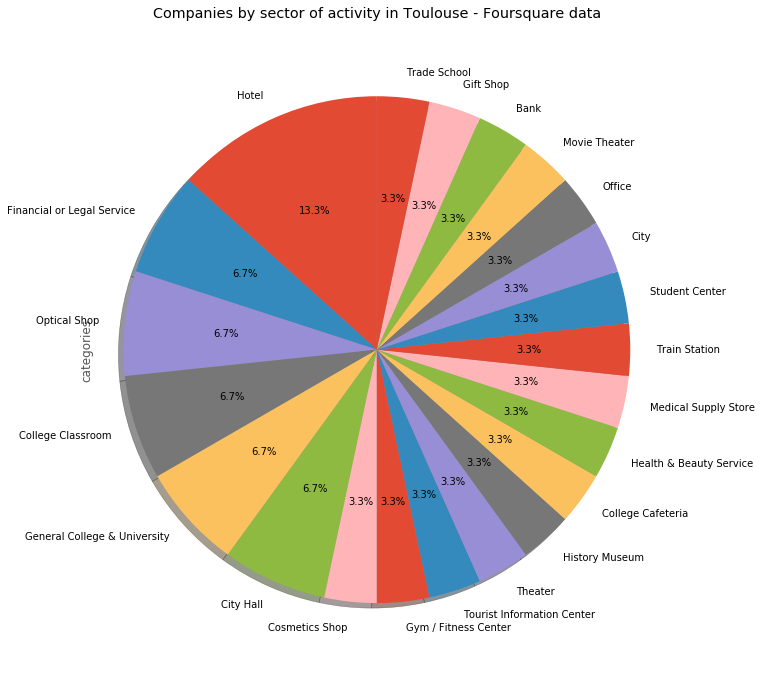

In [38]:
categories.plot(kind='pie',
                            figsize=(10, 12),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Companies by sector of activity in Toulouse - Foursquare data')
plt.axis('equal') 

plt.show()

In [18]:
center_distance = dataframe_filtered['distance']

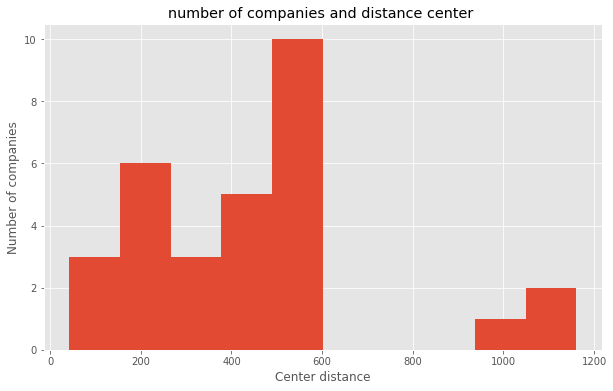

In [19]:
center_distance.plot(kind='hist', figsize=(10, 6))

plt.title('number of companies and distance center ')
plt.ylabel('Number of companies')
plt.xlabel('Center distance')

plt.show()

In [20]:
conda install -c anaconda xlrd

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\redge\anaconda3

  added / updated specs:
    - xlrd


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.8.3-py37hc8dfbb8~ --> anaconda::conda-4.8.3-py37_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [21]:
pietons = pd.read_excel('comptages-pietons-1.xls')
pietons.columns

Index(['Geo Point', 'Geo Shape', 'adresse', 'transposÃ©e', 'comptage', 'annee',
       'jours', 'moment dans la journÃ©e'],
      dtype='object')

In [22]:
pietons.head()

,Geo Point,Geo Shape,adresse,transposÃ©e,comptage,annee,jours,moment dans la journÃ©e
0,"43.6078255639,1.44587679059","{""type"": ""Point"", ""coordinates"": [1.4458767905...",devant la brasserie rue Bayard,semaine_soir_2008,778,2008.0,semaine,soir
1,"43.6078255639,1.44587679059","{""type"": ""Point"", ""coordinates"": [1.4458767905...",devant la brasserie rue Bayard,semaine_journee_2015,514,2015.0,semaine,journee
2,"43.6078255639,1.44587679059","{""type"": ""Point"", ""coordinates"": [1.4458767905...",devant la brasserie rue Bayard,samedi_soir_2015,921,2015.0,samedi,soir
3,"43.6078255639,1.44587679059","{""type"": ""Point"", ""coordinates"": [1.4458767905...",devant la brasserie rue Bayard,samedi_journee_2014,1096,2014.0,samedi,journee
4,"43.6078255639,1.44587679059","{""type"": ""Point"", ""coordinates"": [1.4458767905...",devant la brasserie rue Bayard,samedi_journee_2012,826,2012.0,samedi,journee


In [23]:
pietons_clean = pietons.drop(['Geo Point', 'Geo Shape', 'transposÃ©e','moment dans la journÃ©e', 'jours', 'annee'], axis=1)

In [24]:
pietons_clean

,adresse,comptage
0,devant la brasserie rue Bayard,778
1,devant la brasserie rue Bayard,514
2,devant la brasserie rue Bayard,921
3,devant la brasserie rue Bayard,1096
4,devant la brasserie rue Bayard,826
...,...,...
8031,8 place Arnaud Bernard,0
8032,8 place Arnaud Bernard,296
8033,8 place Arnaud Bernard,0
8034,8 place Arnaud Bernard,0


In [25]:
pietons_clean.dtypes

adresse     object
comptage    object
dtype: object

In [26]:
pietons_clean['comptage'] = pietons_clean['comptage'].apply(pd.to_numeric, args=('coerce',))

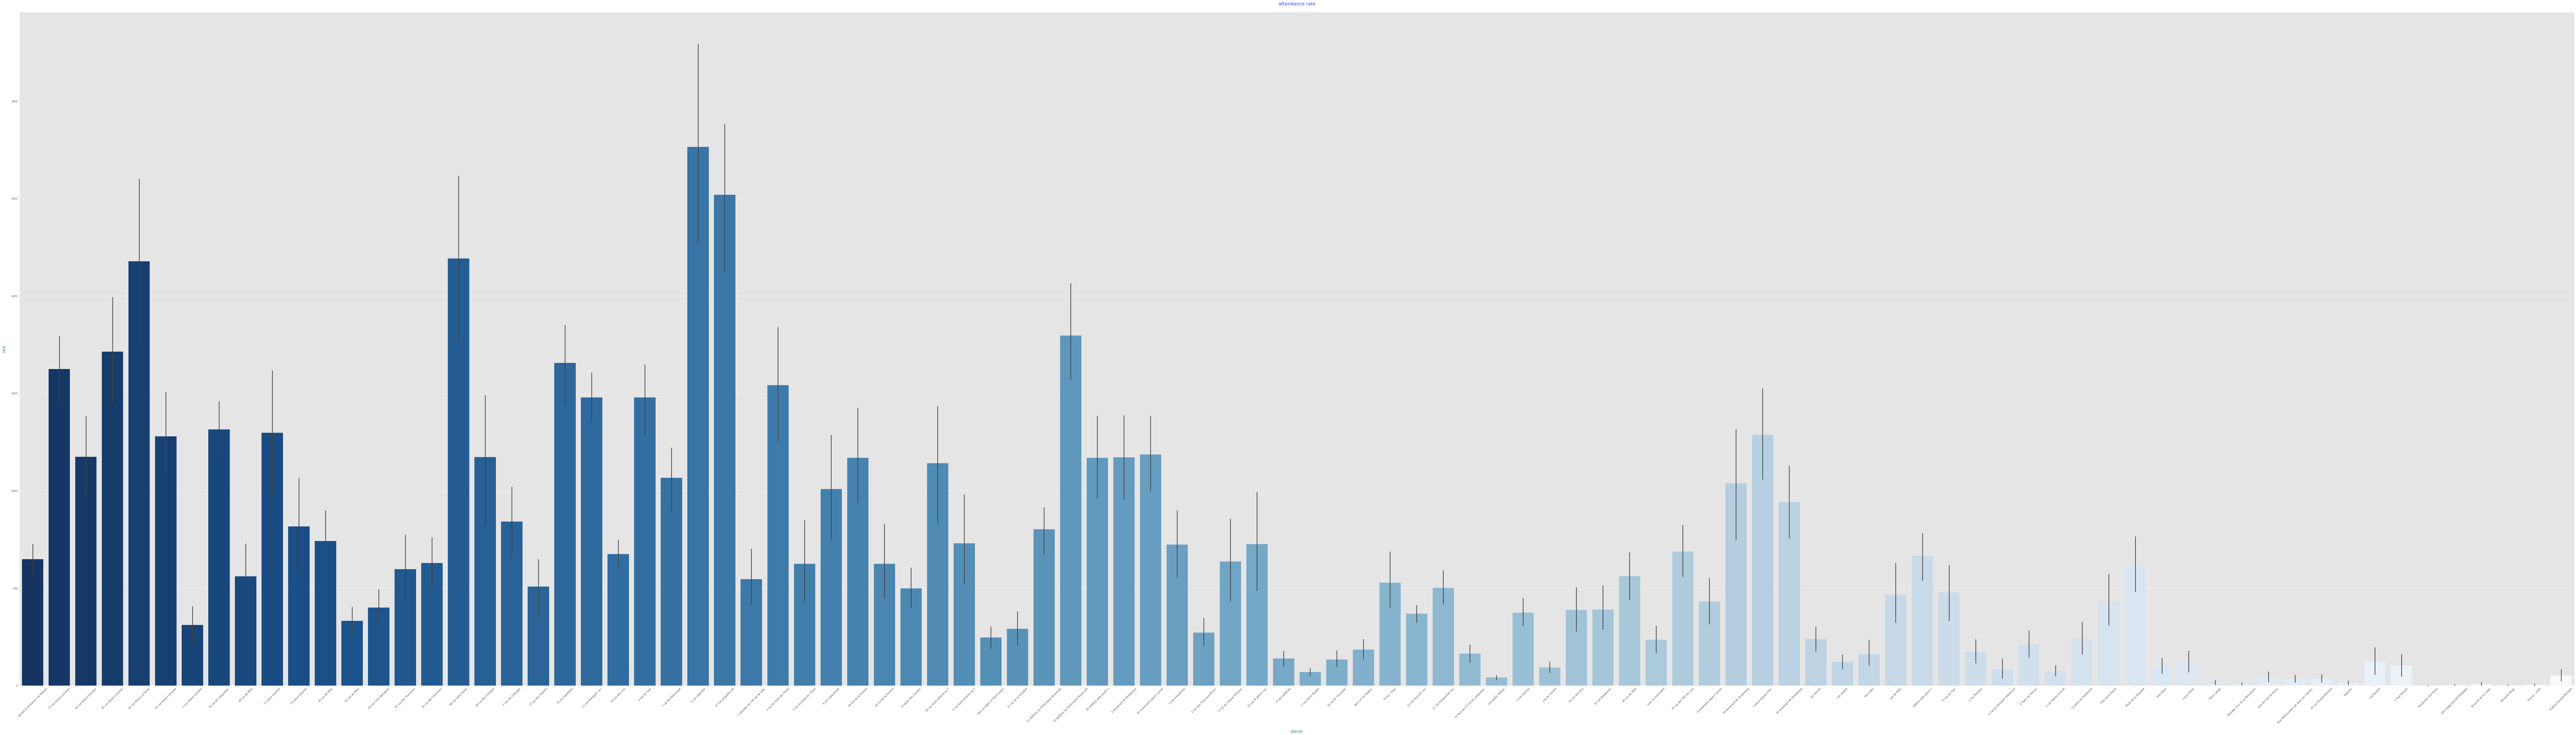

In [27]:
import seaborn as sns

plt.figure(figsize=(140,40))
sns.barplot(x=pietons_clean['adresse'], y=pietons_clean['comptage'], palette="Blues_r")
plt.xlabel('\nplaces', fontsize=15, color='#2980b9')
plt.ylabel('rate\n', fontsize=15, color='#2980b9')
plt.title("attendance rate\n", fontsize=18, color='#3742fa')
plt.xticks(rotation= 45)
plt.tight_layout()

On peut voir ici que ce n'est pas très visuel, mais on peut se rendre compte que certains éléments sortent quand même du lot. 
Nous allons trier encore plus le jeu de données pour n'afficher que les valeurs les plus importantes. 

In [28]:
pietons_clean = pietons_clean.sort_values(by = 'comptage', ascending = False)

In [29]:
pietons_clean = pietons_clean.head(10)
pietons_clean

,adresse,comptage
2019,5 rue Lafayette,11445.0
3606,5 rue Lafayette,11093.0
5105,48 rue Saint Rome,8962.0
413,5 rue Lafayette,8681.0
3610,5 rue Lafayette,8385.0
3231,45 rue Alsace Lorraine,7304.0
2025,5 rue Lafayette,7299.0
86,45 rue Alsace Lorraine,7280.0
1885,48 rue Saint Rome,7222.0
7068,14 AllÃ©es du PrÃ©sident Roosevelt,6994.0


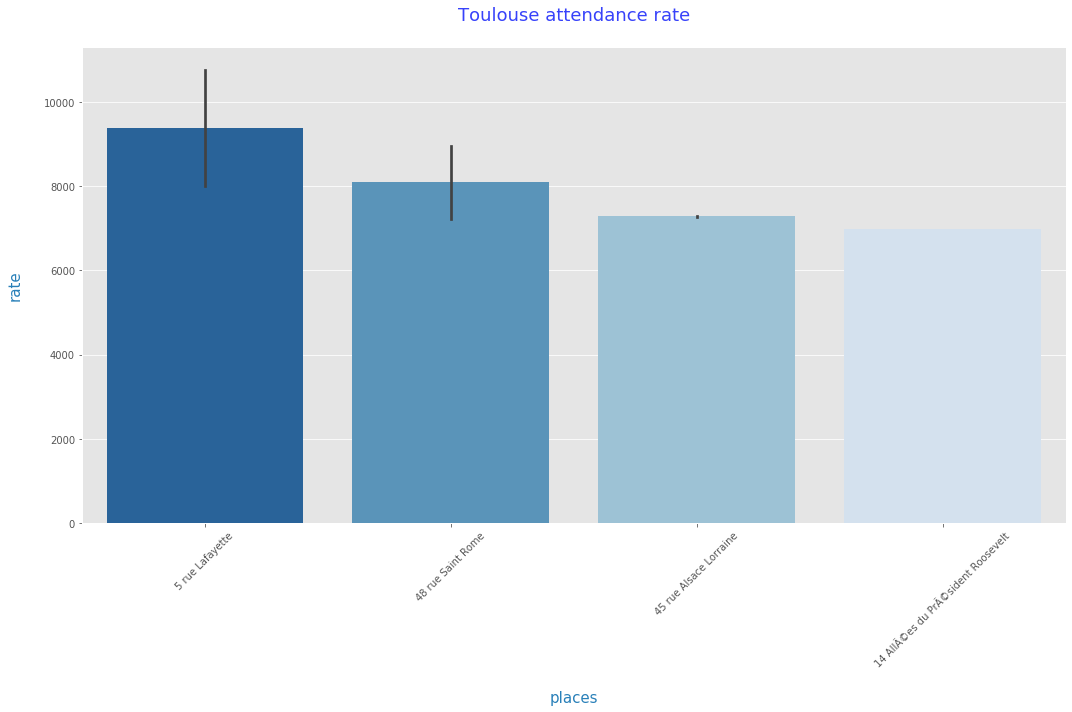

In [30]:
plt.figure(figsize=(15,10))
sns.barplot(x=pietons_clean['adresse'], y=pietons_clean['comptage'], palette="Blues_r")
plt.xlabel('\nplaces', fontsize=15, color='#2980b9')
plt.ylabel('rate\n', fontsize=15, color='#2980b9')
plt.title("Toulouse attendance rate\n", fontsize=18, color='#3742fa')
plt.xticks(rotation= 45)
plt.tight_layout()

On peut voir ici que le quartier de toulouse ayant le plus de fréquentation est "Rue Lafayette", seconde place pour "Saint Rome" et enfin on trouve "Alsace Lorraine". Il serait intéressant de comparer nos données, dans le but de trouver une possible corrélation entre le taux de fréquentation et la localisation des entreprises.

Partie analyse des companies, impact de la localisation sur les likes: 


Régréssion linéaire : 

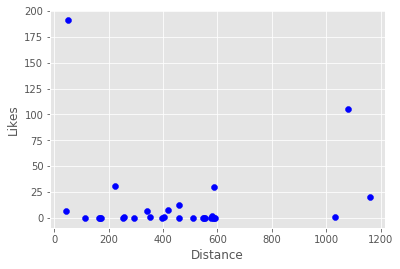

In [31]:
plt.scatter(dataframe_filtered.distance, dataframe_filtered.likes,  color='blue')
plt.xlabel("Distance")
plt.ylabel("Likes")
plt.show()

In [32]:
train_data = dataframe_filtered[['distance','likes']]
train_data = train_data.astype('float64')

In [33]:
msk = np.random.rand(len(train_data)) < 0.8
train = train_data[msk]
test = train_data[~msk]

Look the train data distribution : 

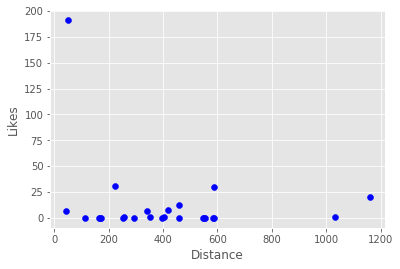

In [34]:
plt.scatter(train.distance, train.likes,  color='blue')
plt.xlabel("Distance")
plt.ylabel("Likes")
plt.show()

In [35]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['distance']])
train_y = np.asanyarray(train[['likes']])
regr.fit (train_x, train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.031752]]
Intercept:  [25.32306592]


Text(0, 0.5, 'likes')

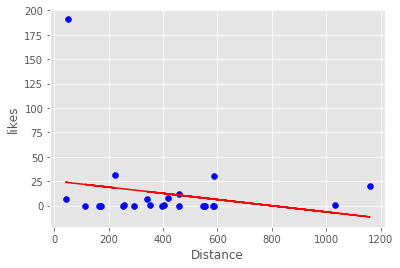

In [36]:
plt.scatter(train.distance, train.likes,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Distance")
plt.ylabel("likes")

On peut constater que le nombre de like baisse globalement avec l'augmentation de la distance. Le modèle ne s'applique pas très bien, la régression linéaire n'est pas très efficace. Nous allons tenter une autre approche pour voir si il est possible de faire resortir d'autres éléments. On peut voir que les distances courte ont plus de likes, plus on l'éloigne, moins il y a de likes pour les établissements. On peut donc prédire une certaine décroissance du nombre de like en s'éloignant du centre de Toulouse.

Nous allons maintenant observer les données de l'Insee afin de mieux comprendre l'environnement ou une entreprise peut s'implanter

In [73]:
cat_socio = pd.read_excel('categories socio.xlsx')

In [74]:
cat_socio

,Unnamed: 0,Nombre de ménages
0,Agriculteurs exploitants,133
1,"Artisans, commerçants, chefs d'entreprise",8307
2,Cadres et professions intellectuelles supérieures,50393
3,Professions intermédiaires,44889
4,Employés,40543
5,Ouvriers,24838
6,Retraités,41687
7,Sans activité,44208


In [75]:
pd.to_numeric(cat_socio['Nombre de ménages'], errors='coerce')

0      133
1     8307
2    50393
3    44889
4    40543
5    24838
6    41687
7    44208
Name: Nombre de ménages, dtype: int64

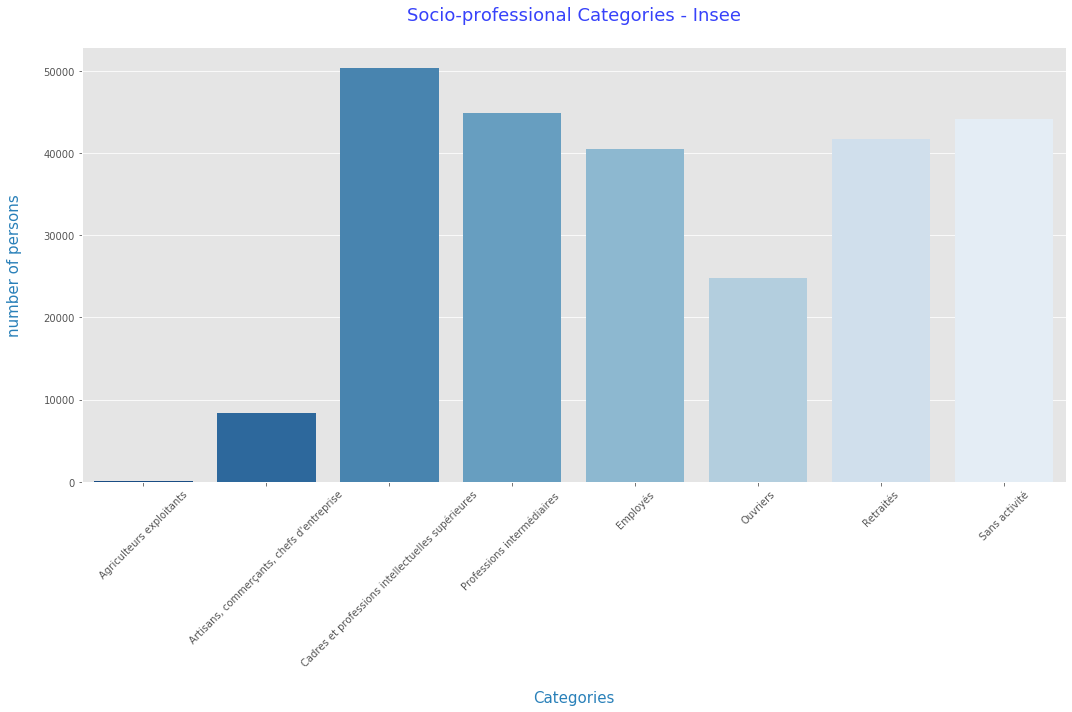

In [80]:
plt.figure(figsize=(15,10))
sns.barplot(x=cat_socio['Unnamed: 0'], y=cat_socio['Nombre de ménages'], palette="Blues_r")
plt.xlabel('\nCategories', fontsize=15, color='#2980b9')
plt.ylabel('number of persons\n', fontsize=15, color='#2980b9')
plt.title("Socio-professional Categories - Insee\n", fontsize=18, color='#3742fa')
plt.xticks(rotation= 45)
plt.tight_layout()

D'un simple coup d'oeil, on peut voir la répartition des catégories. Nous sommes dans un milieu purement citadin, il est donc normal qu'il y ait peu d'agriculteurs et d'ouvriers. On sera probablement surpris par le nombre de personnes sans activité, qui reprensente tout de même un part importante du total, probablement car les étudiants ont été pris en compte dans le sondage, la ville comporte un nombre important d'écoles. Selon notre analyse,  sur Toulouse, nous avons une part de de cadre très important, ce qui peut nous montrer un cible à adopter pour un business

In [83]:
sect_act = pd.read_excel('Secteur activité.xlsx')

In [84]:
sect_act

,Unnamed: 0,Total
0,"Agriculture, sylviculture et pêche",82
1,Industrie,1834
2,Construction,5047
3,"Commerce, transports, services divers",38803
4,"Administration publique, enseignement, santé, ...",9372


In [85]:
pd.to_numeric(sect_act['Total'], errors='coerce')

0       82
1     1834
2     5047
3    38803
4     9372
Name: Total, dtype: int64

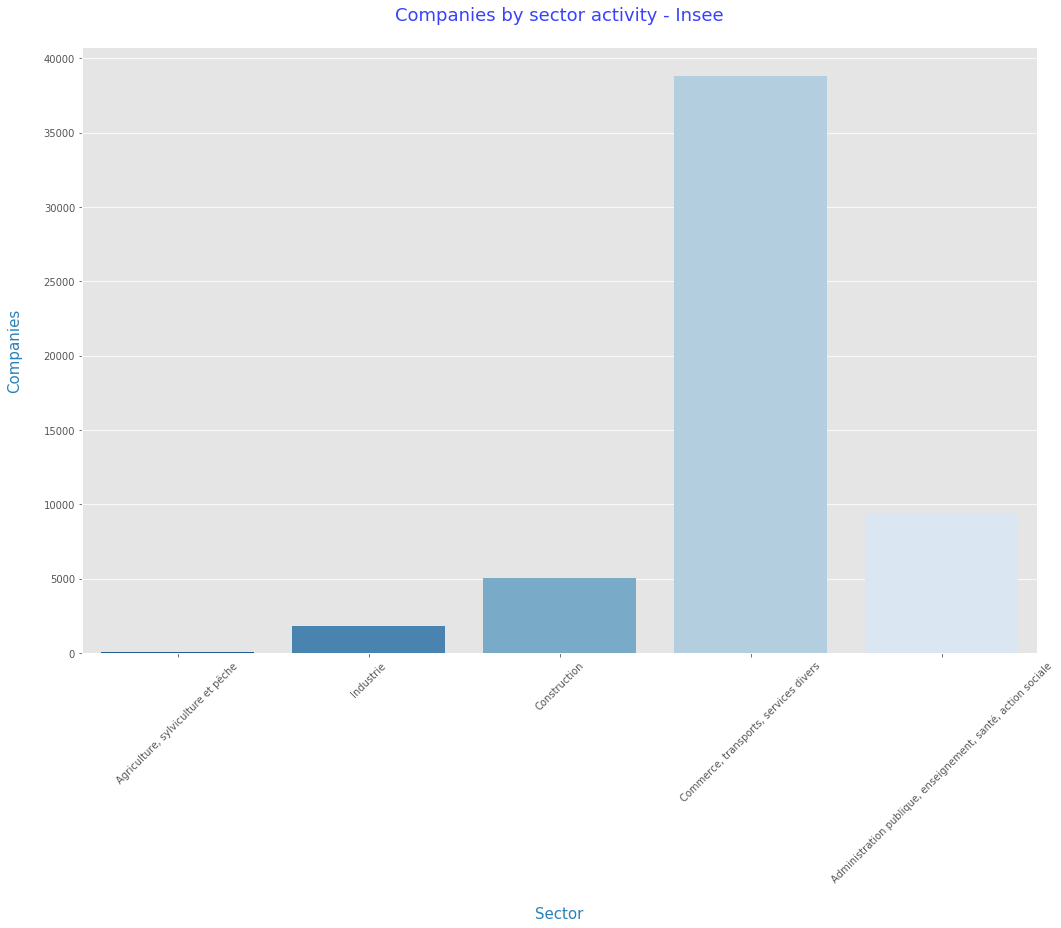

In [95]:
plt.figure(figsize=(15,13))
sns.barplot(x=sect_act['Unnamed: 0'], y=sect_act['Total'], palette="Blues_r")
plt.xlabel('\nSector', fontsize=15, color='#2980b9')
plt.ylabel('Companies\n', fontsize=15, color='#2980b9')
plt.title("Companies by sector activity - Insee\n", fontsize=18, color='#3742fa')
plt.xticks(rotation= 45)
plt.tight_layout()

On peut voir via les données de l'insee, que les entreprises les plus implantées, comme l'on peut le voir sur les données de l'insee, sont des entreprises de service, cela est encore lié au fait que nous soyons dans un milieu purement urbain. Cela confirme également les données de Foursquare, qui sont moins quantitatives mais nous donne un indicateur plus précis des entreprises implantées dans la ville. 